In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
iris = pd.read_csv('../../data/Iris.csv')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

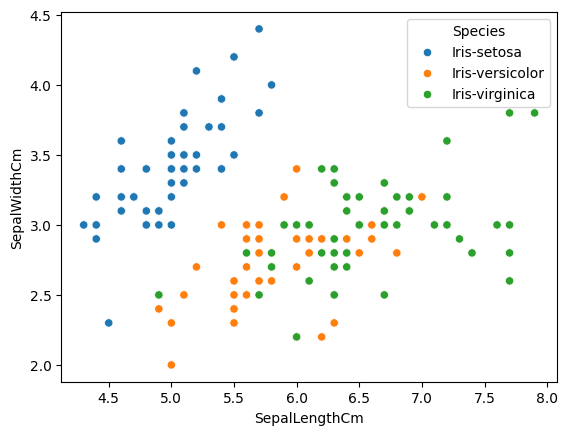

In [6]:
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

In [4]:
X = iris.drop(columns=['Species'], axis=1)
y = iris['Species']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = range(1, 100)

scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 143, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
               

In [39]:
scores

[np.float64(1.0),
 np.float64(0.9916666666666668),
 np.float64(0.9916666666666668),
 np.float64(0.9833333333333332),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.9916666666666668),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.9833333333333332),
 np.float64(0.9833333333333332),
 np.float64(0.9833333333333332),
 np.float64(0.975),
 np.float64(0.9833333333333332),
 np.float64(0.9833333333333332),
 np.float64(0.9833333333333332),
 np.float64(0.9666666666666666),
 np.float64(0.9833333333333332),
 np.float64(0.9666666666666666),
 np.float64(0.975),
 np.float64(0.9666666666666666),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.975),
 np.float64(0.9916666666666668),
 np.float64(0.975),
 np.float64(0.9916666666666668),
 np.float64(0.9833333333333332),
 np.float64(0.9916666666666668),
 np.float64(0.9916666666666668),
 np.float64(0.9916666666666668),
 n

<Axes: >

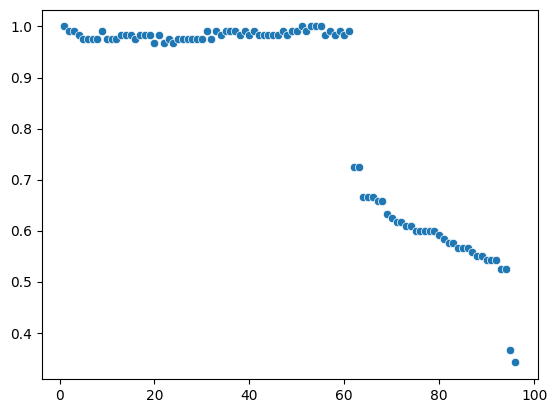

In [40]:
sns.scatterplot(x=k_values, y=scores)

In [32]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [33]:
y_pred = knn.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [35]:
accuracy

1.0

In [36]:
cm

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 11]])

In [37]:
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

